# 4.3 離散型確率分布

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## 4.3.4 ポアソン分布

In [4]:
μ = 2.0
d = Poisson(μ)

Poisson{Float64}(λ=2.0)

In [5]:
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Int64}) with eltype Int64:
 2  3  2  0  0  1  1  3  2  2  1  3  5  …  2  4  5  0  3  4  3  0  5  3  2  2

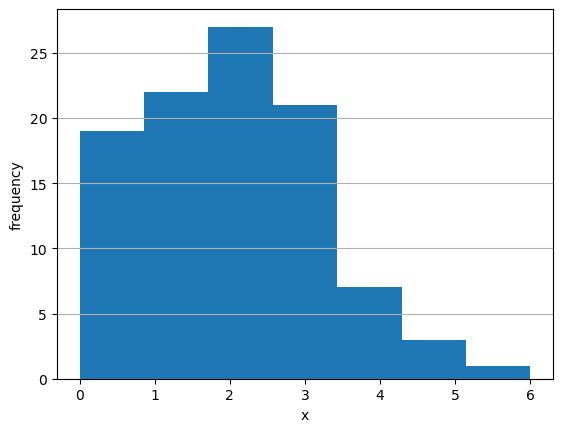

false

In [6]:
max_val = maximum(X)
fig, ax = subplots()
ax.hist(X, bins=max_val+1, range=[0, max_val])
set_options(ax, "x", "frequency", ""; gridy=true)

In [7]:
println("mean(exact) = $(mean(d)), mean(approx) = $(mean(X))")

mean(exact) = 2.0, mean(approx) = 1.88


In [8]:
println("var(exact) = $(var(d)), var(approx) = $(var(X))")

var(exact) = 2.0, var(approx) = 1.904646464646464


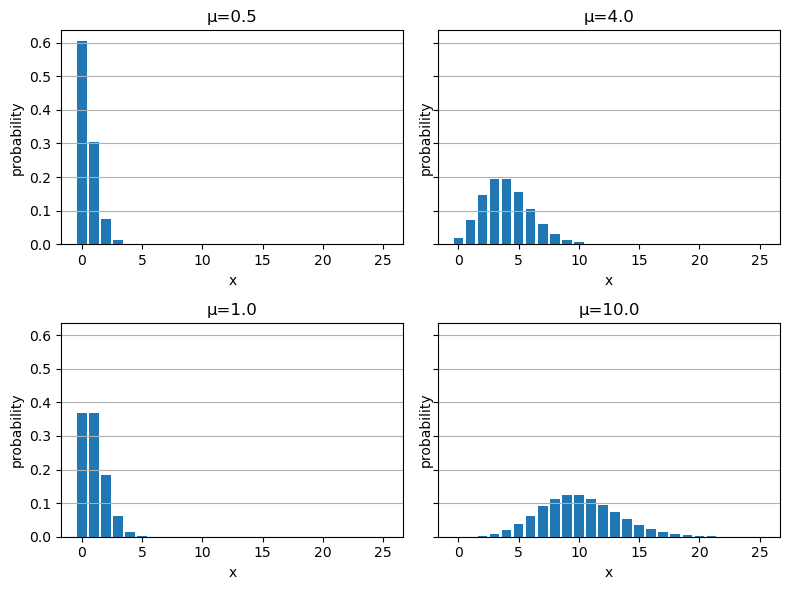

In [10]:
# 表示範囲は0から25までとする
xs = 0:25

# 平均パラメータのリスト
μs = [0.5, 1.0, 4.0, 10.0]

fig, axes = subplots(2, 2, sharey=true, figsize=(8,6))
for (i, ax) in enumerate(axes)
    μ = μs[i]
    d = Poisson(μ)
    ax.bar(xs, pdf.(d, xs))
    set_options(ax, "x", "probability", "μ=$(μ)"; gridy=true)
end
tight_layout()